In [1]:
import matplotlib.pyplot as plt
import  hiive.mdptoolbox.mdp as mdp
import  hiive.mdptoolbox.example as ex
import numpy as np

In [2]:
Prand, Rrand = ex.rand(100, 99)


In [4]:
Pforest, Rforest = ex.forest(2500)


In [5]:
discounts = [0.1, 0.25, 0.50, 0.9, 0.92, 0.94, 0.96, 0.98, 0.99]

In [6]:
epsilons = [0.1,0.05,0.03,0.01,0.01,0.001]

In [7]:
def slice_per(source, step):
    return [source[i::step] for i in range(step)]

# Value Iteration

In [62]:
# V (tuple) – value function
# policy (tuple) – optimal policy
# iter (int) – number of done iterations
# time (float) – used CPU time
resultsForest = []

for e in epsilons:
    for d in discounts:
        vi = mdp.ValueIteration(Pforest, Rforest, gamma=d, epsilon=e)
        vi.run()
        resultsForest.append(vi)

[0, 1, 2, 9, 10, 11, 18, 19, 20, 27, 28, 29, 36, 37, 38, 45, 46, 47]
[2.6673555555555555, 1.5762267881944447, 1.0235033400647664, 0.5876713117340175, 0.5614294050918454, 0.5334481218665502, 0.5035725646147229, 0.45952653050584935, 0.43113311743413885]


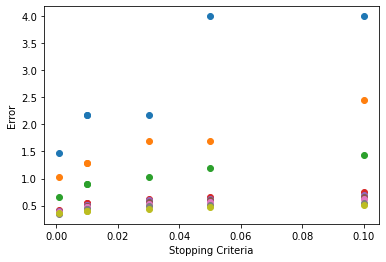

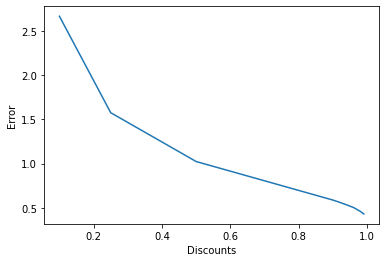

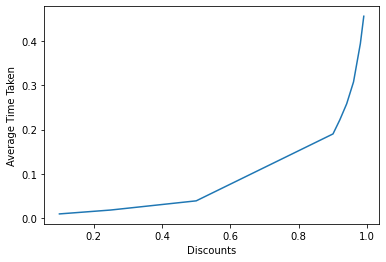

In [45]:
print([ind for ind, entry in enumerate(resultsForest) if entry.time < 0.1 ])
errValsResForest = slice_per([entry.error_mean[0]  for entry in resultsForest ], 9  )
timeValsResForest = slice_per([entry.time  for entry in resultsForest ], 9  )
print( [np.mean(entry) for entry in errValsResForest] )
for entry in errValsResForest:
    
    plt.scatter(epsilons, entry)
plt.xlabel('Stopping Criteria')
plt.ylabel('Error')
plt.show()
plt.plot(discounts, [np.mean(entry) for entry in errValsResForest] )
plt.xlabel('Discounts')
plt.ylabel('Error')
plt.show()
plt.plot(discounts, [np.mean(entry) for entry in timeValsResForest] )
plt.xlabel('Discounts')
plt.ylabel('Average Time Taken')
plt.show()

In [43]:
resultsRand= [ [] for _ in range(10)]
for i in range(10):
    for e in epsilons:
        for d in discounts:
            vi = mdp.ValueIteration(Prand, Rrand, gamma=d, epsilon=e)
            vi.run()
            resultsRand[i].append(vi)

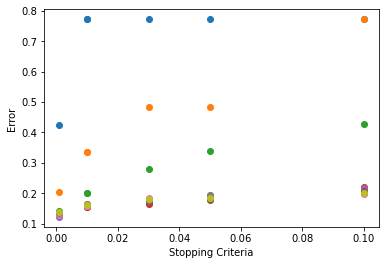

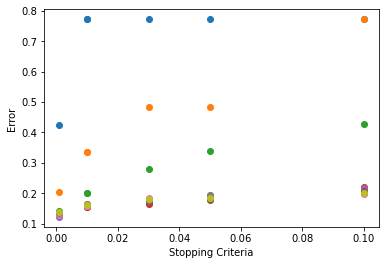

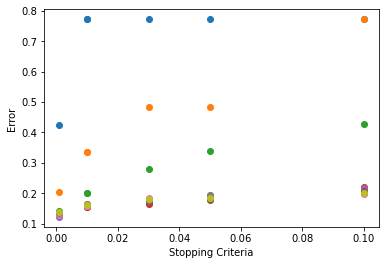

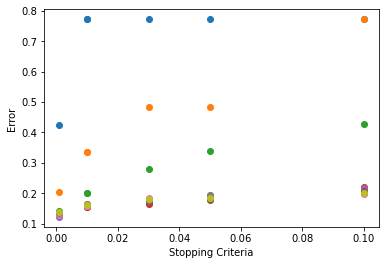

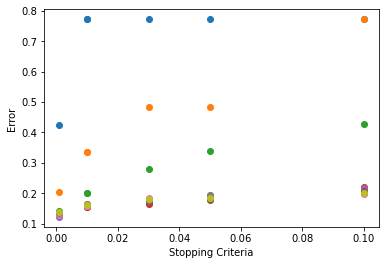

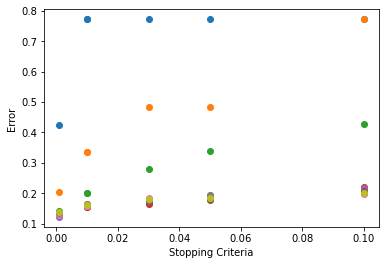

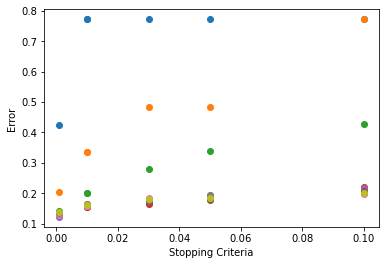

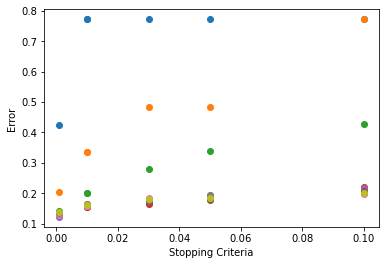

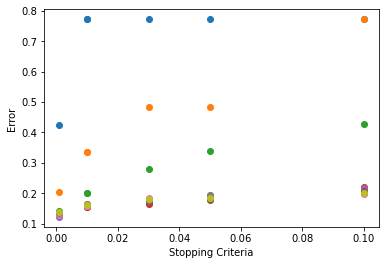

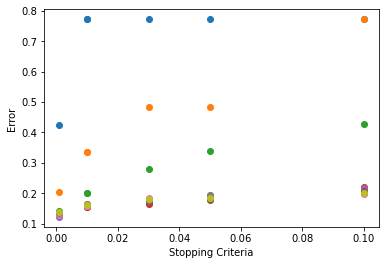

In [49]:
errValsResForest = [ [] for _ in range(10)]
meansValResForest = [ [] for _ in range(10)]
for  i in range(10):
    errValsResForest[i] = slice_per([entry.error_mean[0]  for entry in resultsRand[i]], 9  )
    meansValResForest[i] = [np.mean(entry.error_mean[0] ) for entry in resultsRand[i]] 
    for entry in errValsResForest[i]:
        plt.scatter(epsilons, entry)
    plt.xlabel('Stopping Criteria')
    plt.ylabel('Error')
    plt.show()


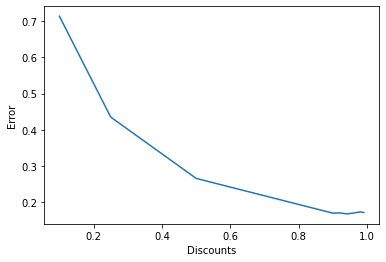

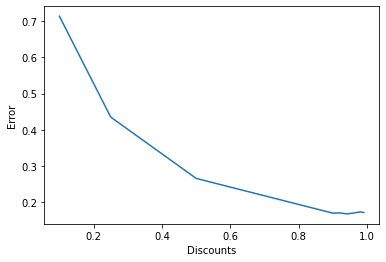

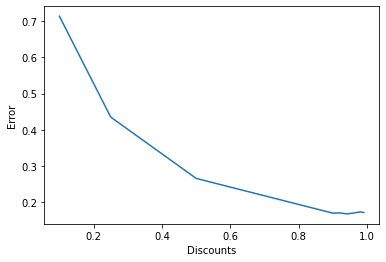

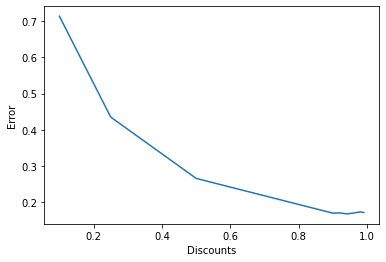

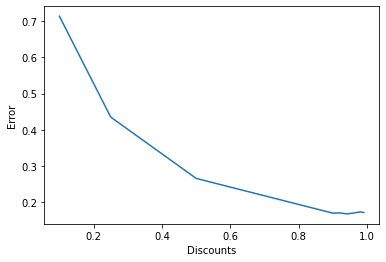

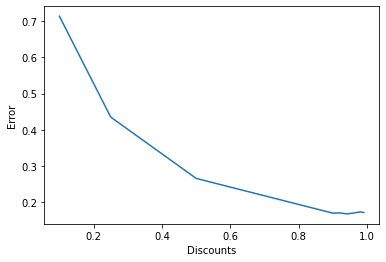

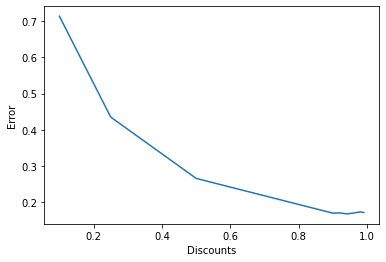

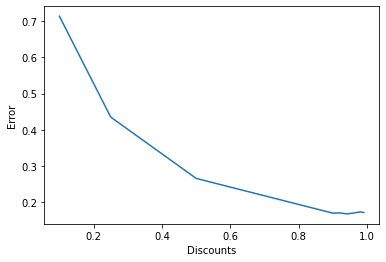

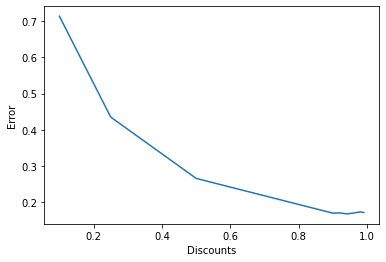

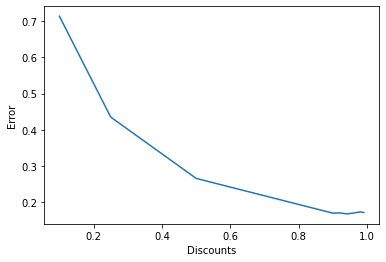

In [50]:
for i in range(10):
    plt.plot(discounts, [np.mean(entry) for entry in errValsResForest[i]] )
    plt.xlabel('Discounts')
    plt.ylabel('Error')
    plt.show()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 4

(array([136.,  39.,   6.,  38.,  94., 109.,  61.,  41.,  12.,   4.]),
 array([0.        , 0.0036994 , 0.0073988 , 0.01109819, 0.01479759,
        0.01849699, 0.02219639, 0.02589579, 0.02959518, 0.03329458,
        0.03699398]),
 <BarContainer object of 10 artists>)

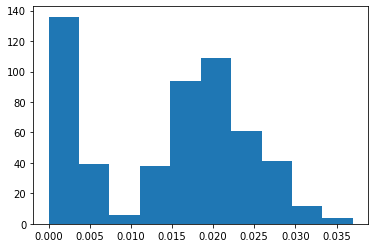

In [95]:
print([ind for run in resultsRand for ind, entry in enumerate(run)  ])
print([entry.iter for run in resultsRand for ind, entry in enumerate(run) ])
print([entry.iter for run in resultsRand for ind, entry in enumerate(run)  ])
plt.hist([entry.time for run in resultsRand for entry in run])

# Policy Iteration 

In [89]:
resultsPolicyForest =  []
for e in epsilons:
    for d in discounts:
        vi = mdp.PolicyIterationModified(Pforest, Rforest, gamma=d, epsilon=e)
        vi.run()
        resultsPolicyForest.append(vi)

In [105]:
print(resultsPolicyForest[0])

P: 
array([[0.1, 0.9, 0. , ..., 0. , 0. , 0. ],
       [0.1, 0. , 0.9, ..., 0. , 0. , 0. ],
       [0.1, 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0.1, 0. , 0. , ..., 0. , 0.9, 0. ],
       [0.1, 0. , 0. , ..., 0. , 0. , 0.9],
       [0.1, 0. , 0. , ..., 0. , 0. , 0.9]])
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

R: 
array([0., 0., 0., ..., 0., 0., 4.])
array([0., 1., 1., ..., 1., 1., 2.])



In [100]:
errValsResForest = slice_per([entry.error_mean for entry in resultsPolicyForest ], 9  )
print(errValsResForest)
timeValsResForest = slice_per([entry.time  for entry in resultsPolicyForest ], 9  )

for entry in errValsResForest:
    plt.scatter(epsilons, entry)
plt.xlabel('Stopping Criteria')
plt.ylabel('Error')
plt.show()
plt.plot(discounts, [np.mean(entry) for entry in errValsResForest] )
plt.xlabel('Discounts')
plt.ylabel('Error')
plt.show()
plt.plot(discounts, [np.mean(entry) for entry in timeValsResForest] )
plt.xlabel('Discounts')
plt.ylabel('Average Time Taken')
plt.show()

[[[], [], [], [], [], []], [[], [], [], [], [], []], [[], [], [], [], [], []], [[], [], [], [], [], []], [[], [], [], [], [], []], [[], [], [], [], [], []], [[], [], [], [], [], []], [[], [], [], [], [], []], [[], [], [], [], [], []]]


ValueError: x and y must be the same size

(array([12.,  6.,  0.,  0.,  0., 12.,  6.,  6.,  0., 12.]),
 array([ 2. ,  3.7,  5.4,  7.1,  8.8, 10.5, 12.2, 13.9, 15.6, 17.3, 19. ]),
 <BarContainer object of 10 artists>)

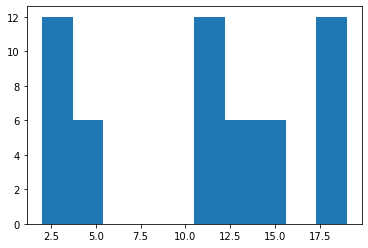

In [90]:
plt.hist([entry.iter for entry in resultsPolicyForest])

In [39]:
resultsPolicyRand=  [ [] for _ in range(10)]
for i in range(10):
    for e in epsilons:
        for d in discounts:
            vi = mdp.PolicyIterationModified(Prand, Rrand, gamma=d, epsilon=e)
            vi.run()
            resultsPolicyRand[i].append(vi)

In [44]:
errValsResForest = []
meansValResForest = []
for  i in range(10):
    errValsResForest[i] = slice_per([entry.error_mean[0]  for entry in resultsPolicyRand[i]], 9  )
    meansValResForest[i] = [np.mean(entry.error_mean[0] ) for entry in resultsPolicyRand[i]] 
    for entry in errValsResForest[i]:
        plt.scatter(epsilons, entry)
    plt.xlabel('Stopping Criteria')
    plt.ylabel('Error')
    plt.show()

IndexError: list index out of range

# Q Learning

In [8]:
resultsForestQ =  []
for e in epsilons:
    for d in discounts:
        vi = mdp.QLearning(Pforest, Rforest, gamma=d, epsilon=e)
        vi.run()
        resultsForestQ.append(vi)

In [50]:
print(len(resultsForestQ[0]))

54


In [49]:
resultsForestQ[0]

P: 
array([[0.1, 0.9, 0. , ..., 0. , 0. , 0. ],
       [0.1, 0. , 0.9, ..., 0. , 0. , 0. ],
       [0.1, 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0.1, 0. , 0. , ..., 0. , 0.9, 0. ],
       [0.1, 0. , 0. , ..., 0. , 0. , 0.9],
       [0.1, 0. , 0. , ..., 0. , 0. , 0.9]])
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

R: 
array([0., 0.])
array([0., 1.])

[0.0067365131622560345, 0.010626126737656985, 0.013065850280767071, 0.01828086076159401, 0.014200681079691656, 0.013046051582032531, 0.01025355056639805, 0.010395287023077043, 0.012605271985869864]


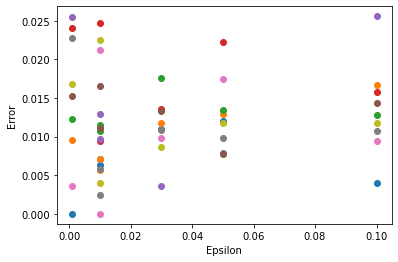

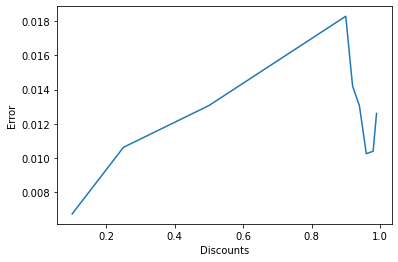

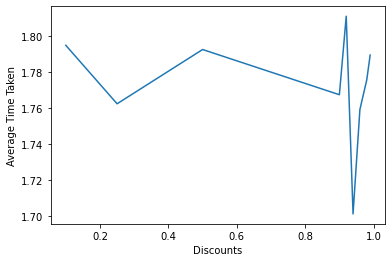

In [56]:

errValsResForest = slice_per([entry.error_mean[0]  for entry in resultsForestQ ], 9  )
timeValsResForest = slice_per([entry.time  for entry in resultsForestQ ], 9  )
print( [np.mean(entry) for entry in errValsResForest] )
for entry in errValsResForest:
    
    plt.scatter(epsilons, entry)
plt.xlabel('Epsilon')
plt.ylabel('Error')
plt.show()
plt.plot(discounts, [np.mean(entry) for entry in errValsResForest] )
plt.xlabel('Discounts')
plt.ylabel('Error')
plt.show()
plt.plot(discounts, [np.mean(entry) for entry in timeValsResForest] )
plt.xlabel('Discounts')
plt.ylabel('Average Time Taken')
plt.show()

In [57]:
resultsRandQ =  [ [] for _ in range(10)]
for i in range(10):
    for e in epsilons:
        for d in discounts:
            vi = mdp.QLearning(Prand, Rrand, gamma=d, epsilon=e)
            vi.run()
            resultsRandQ[i].append(vi)

In [ ]:
print([ind for run in resultsRandQ for ind, entry in enumerate(run)  ])
print([entry.run_stats   for run in resultsRandQ for ind, entry in enumerate(run)  ])

plt.hist([entry.time for run in resultsRandQ for entry in run])

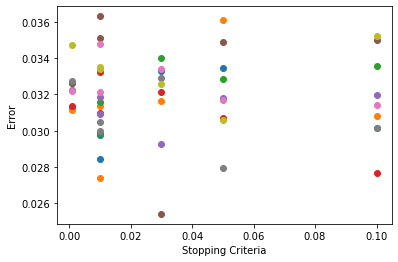

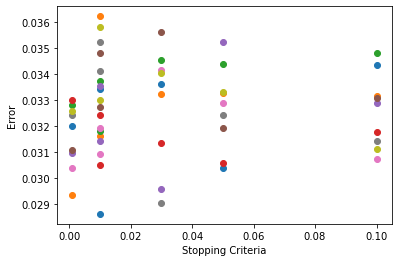

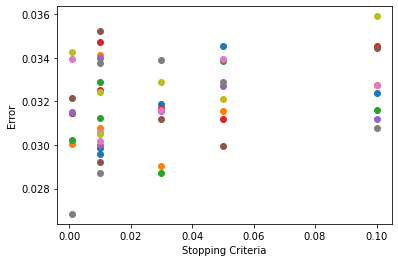

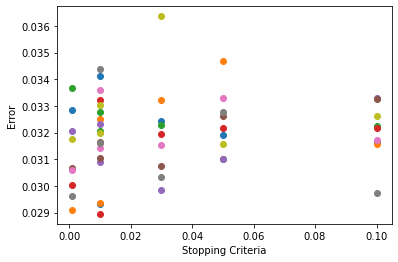

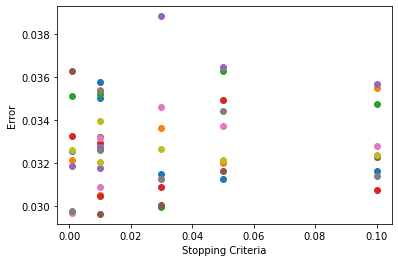

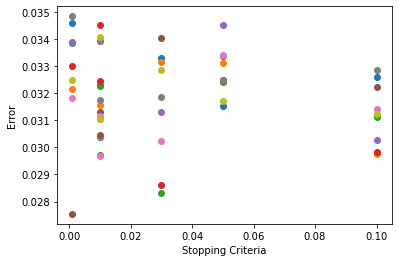

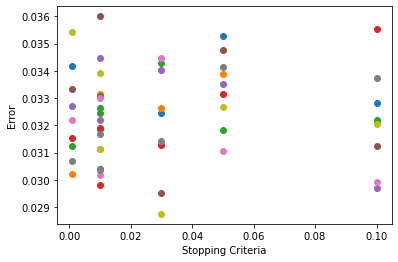

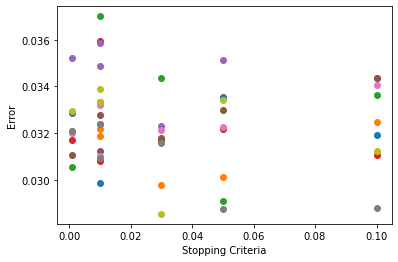

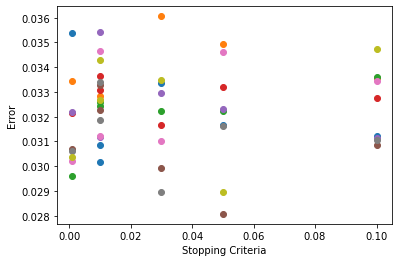

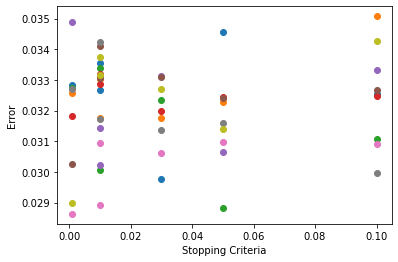

In [58]:
errValsResForest = [ [] for _ in range(10)]
meansValResForest = [ [] for _ in range(10)]
for  i in range(10):
    errValsResForest[i] = slice_per([entry.error_mean[0]  for entry in resultsRandQ[i]], 9  )
    meansValResForest[i] = [np.mean(entry.error_mean[0] ) for entry in resultsRandQ[i]] 
    for entry in errValsResForest[i]:
        plt.scatter(epsilons, entry)
    plt.xlabel('Stopping Criteria')
    plt.ylabel('Error')
    plt.show()


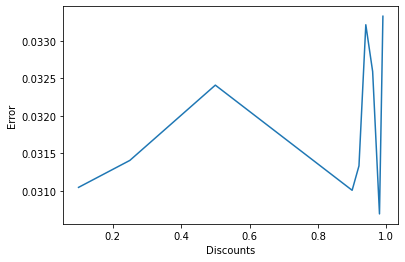

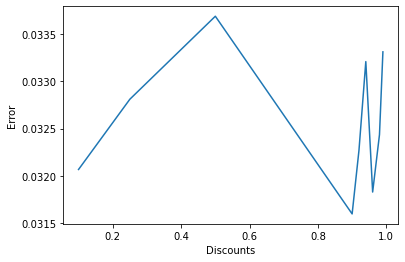

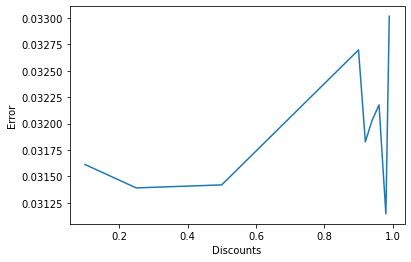

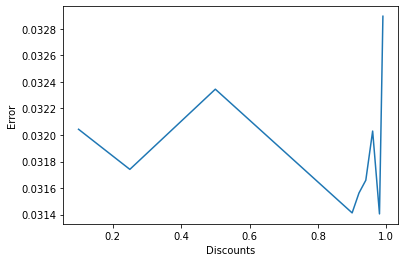

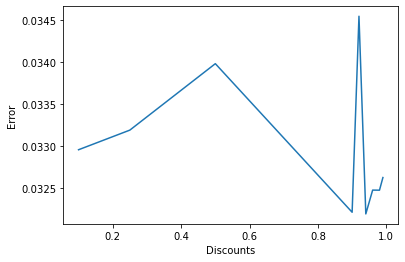

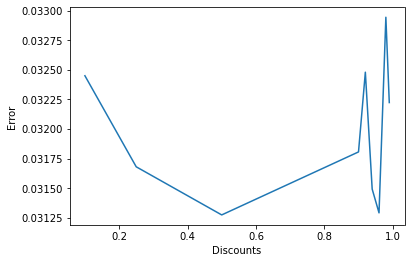

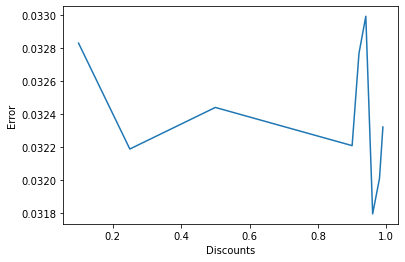

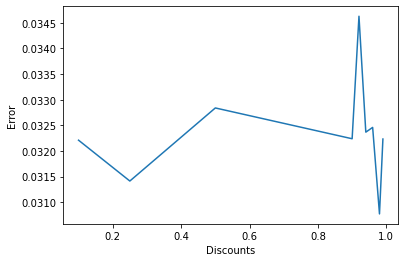

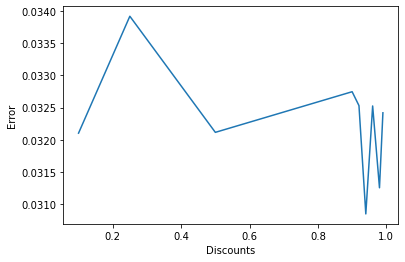

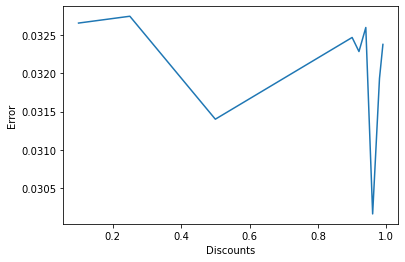

In [59]:
for i in range(10):
    plt.plot(discounts, [np.mean(entry) for entry in errValsResForest[i]] )
    plt.xlabel('Discounts')
    plt.ylabel('Error')
    plt.show()

In [ ]:
# (self, transitions, reward, gamma,
#                  alpha=0.1, alpha_decay=0.99, alpha_min=0.001,
#                  epsilon=1.0, epsilon_min=0.1, epsilon_decay=0.99,
#                  n_iter=10000, skip_check=False, iter_callback=None,
#                  run_stat_frequency=None):

54
